<a href="https://colab.research.google.com/github/PreamJ/LDA_TopicModelling_Legal/blob/main/topicmodelling_answer02_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
!pip install pythainlp
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
from wordcloud import WordCloud
from gensim import corpora, models, similarities
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim
from pprint import pprint
import pickle 
import os
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim.test.utils import datapath
import gensim
import random
from gensim.models.ldamodel import LdaModel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 57.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dpst_project/dataset/DatasetLegal.csv')
data.answer.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    ดอกเบี้ยของเงินฝากสินส่วนตัวของภริยาย่อมเป็นดอ...
1    คุณสามารถร้องขอเป็นผู้จัดการมรดกของบิดาได้ส่วน...
2    เช็คลงวันที่ไม่ตรงกับวันครบกำหนดสัญญา้จะฟ้องร้...
3    คุณมีทางเลือกอยู่ประการประการแรกยื่นคำร้องเพื่...
4    คดีที่มีการฟ้องร้องแล้วและศาลอ่านคำพิพากษาเกิน...
Name: answer, dtype: object

In [ ]:
str_answer = data['answer'].astype(str)
str_answer = str_answer.map(lambda x: re.sub('[,\.!?#]', '', x))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
<ipython-input-4-fb7c88273203>:2: DeprecationWarning: invalid escape sequence \.
  str_answer = str_answer.map(lambda x: re.sub('[,\.!?#]', '', x))


In [ ]:
sentense_token_answer = []
for each_answer in str_answer:
  sentense_token_answer.append(each_answer)
print(sentense_token_answer[:5])
train_data = sentense_token_answer[:6030]
test_data = sentense_token_answer[6031:7030]

['ดอกเบี้ยของเงินฝากสินส่วนตัวของภริยาย่อมเป็นดอกผลนิตินัยของสินส่วนตัวดอกเบี้ยดังกล่าวจึงเป็นสินสมรสตามความปพพมาตราแต่การที่ท่านประสงค์จะทำข้อตกลงหรือจดแจ้งไว้ในทะเบียนสมรสเกี่ยวด้วยเรื่องการเปลี่ยนดอกเบี้ยเงินฝากสินสมรสให้เป็นสินส่วนตัวของภริยาแต่เพียงฝ่ายเดียวไม่อาจกระทำได้โดยชอบเพราะเป็นการที่มีวัตถุประสงค์ต้องห้ามชัดแจ้งโดยกฎหมายและขัดต่อความสงบเรียบร้อยหรือศีลธรรมอันดีของประชาชนหากท่านและสามีฝ่าฝืนกระทำไปซึ่งเป็นการทำสัญญาระหว่างสมรสเกี่ยวกับทรัพย์สินระหว่างสามีภริยานั้นสัญญานั้นย่อมตกเป็นมฆะตามมาตราแต่อย่างไรก็ตามสามีอาจทำสัญญาการสละสิทธิแห่งดอกเบี้ยเงินฝากดังกล่าวที่เป็นสินสมรสในส่วนของตนให้แก่ภริยาได้อันเป็นการทำสัญญาระหว่างสมรสได้แต่อาจถูกบอกล้างเสียในระหว่างที่เป็นสามีภริยากันอยู่หรือภายในกำหนดปีนับแต่วันที่ขาดจากการเป็นสามีภริยากันก็ได้ตามปพพมาตราส่วนเงินเดือนค่าจ้างของสามีที่ได้มาระหว่างสมรสกับสินสมรสแต่ตราบใดที่ยังเป็นสามีภริยากันตามกฎหมายสามีหรือภริยาจะเรียกให้แบ่งแยกทรัพย์ที่เป็นสินสมรสรวมทั้งเงินเดือนค่าจ้างนี้ไม่อาจกระทำได้โดยชอบตามมาตรา', 'คุณสามารถร้องขอเป็นผู้จัดกา

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
word_token_answer = []
for sentense in train_data:
  word = word_tokenize(sentense, engine='newmm')
  word_token_answer.append(word)

print(word_token_answer[0][:10])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ดอกเบี้ย', 'ของ', 'เงินฝาก', 'สินส่วนตัว', 'ของ', 'ภริยา', 'ย่อม', 'เป็น', 'ดอกผลนิตินัย', 'ของ']


In [ ]:
stopwords = list(thai_stopwords())
read_stopwords = pd.read_csv('/content/drive/MyDrive/dpst_project/dataset/add_stopwords.csv')
add_stopwords = read_stopwords['stopword'].values.tolist()
processed_answer = []
for sentense in word_token_answer:
  each_sentense = []
  for word in sentense:
    if(word not in stopwords + add_stopwords):
      each_sentense.append(word)
  processed_answer.append(each_sentense)
print(processed_answer[0][:8])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ดอกเบี้ย', 'เงินฝาก', 'สินส่วนตัว', 'ภริยา', 'ดอกผลนิตินัย', 'สินส่วนตัว', 'ดอกเบี้ย', 'สินสมรส']


In [ ]:
id2word = corpora.Dictionary(processed_answer)
corpus = []
for text in processed_answer:
  vec = id2word.doc2bow(text)
  corpus.append(vec)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
num_topics = 5
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       iterations=100,
                                       chunksize=200,
                                       passes=5,
                                       alpha=0.5,
                                       eta=0.01
                                       )

In [ ]:
from gensim.test.utils import datapath

#saving model to disk.

temp_file = datapath("/content/drive/MyDrive/dpst_project/lda_model.pickle")
lda_model.save(temp_file)

In [ ]:
topic_dict = {
    0 : "Contract",
    1 : "Criminal",
    2 : "Labor",
    3 : "Family",
    4 : "Succession"
}

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model.show_topics(num_topics=10, num_words=10)

[(0,
  '0.026*"เงิน" + 0.026*"สัญญา" + 0.024*"ฟ้อง" + 0.019*"ชำระหนี้" + 0.016*"เจ้าหนี้" + 0.016*"เช่าซื้อ" + 0.015*"รถ" + 0.014*"บังคับ" + 0.014*"รับผิด" + 0.012*"คืน"'),
 (1,
  '0.060*"นายจ้าง" + 0.048*"ลูกจ้าง" + 0.028*"จ่าย" + 0.022*"เลิกจ้าง" + 0.022*"สิทธิ" + 0.022*"มาตรา" + 0.021*"บริษัท" + 0.018*"ทำงาน" + 0.016*"คุ้มครอง" + 0.015*"ค่าจ้าง"'),
 (2,
  '0.047*"ศาล" + 0.028*"มาตรา" + 0.021*"ความผิด" + 0.018*"จำคุก" + 0.016*"ฐาน" + 0.016*"จำเลย" + 0.015*"กระทำความผิด" + 0.012*"ทนาย" + 0.011*"คำพิพากษา" + 0.010*"บาท"'),
 (3,
  '0.056*"ที่ดิน" + 0.033*"สิทธิ" + 0.028*"มาตรา" + 0.022*"ทายาท" + 0.021*"ผู้จัดการมรดก" + 0.019*"มรดก" + 0.016*"โอน" + 0.014*"ปพพ" + 0.014*"พินัยกรรม" + 0.013*"ทรัพย์มรดก"'),
 (4,
  '0.061*"บุตร" + 0.044*"มาตรา" + 0.042*"สามี" + 0.033*"บิดา" + 0.031*"ปพพ" + 0.030*"มารดา" + 0.027*"เด็ก" + 0.026*"ภริยา" + 0.016*"สิทธิ" + 0.015*"ภรรยา"')]

In [ ]:
lda_model.log_perplexity(corpus)

-23.005046000316916

In [ ]:
from matplotlib.font_manager import FontProperties
font_path = '/content/drive/MyDrive/dpst_project/THSarabun.ttf'
font = FontProperties(fname=font_path, size = 20)
def plotWordDist(n):
  topic_num = n
  topic_words = lda_model.show_topic(topic_num, topn=10)
  words = [word_prob[0] for word_prob in topic_words]
  probs = [word_prob[1] for word_prob in topic_words]

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.bar(words, probs, width=0.6)
  ax.set_title(f"Word Distribution for Topic {topic_dict.get(topic_num)}")
  ax.set_xlabel("Words")
  ax.set_ylabel("Probabilities")
  plt.xticks(fontproperties=font) 
  plt.show()

In [ ]:
lda_model = LdaModel.load('/content/drive/MyDrive/dpst_project/lda_model.pickle')

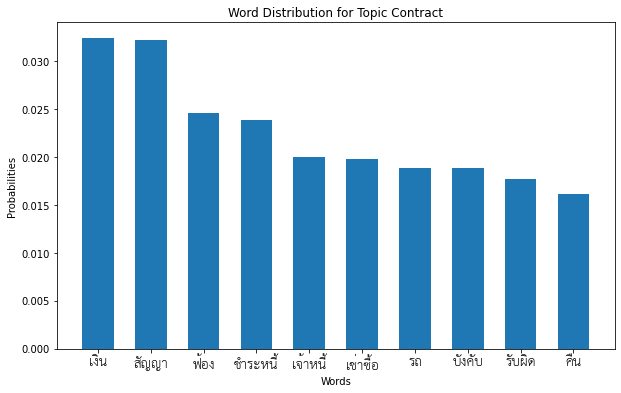

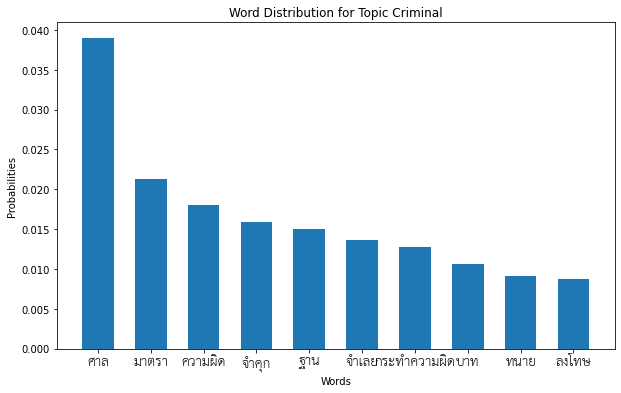

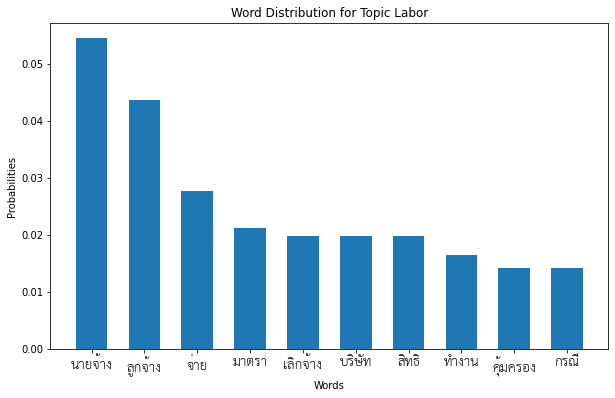

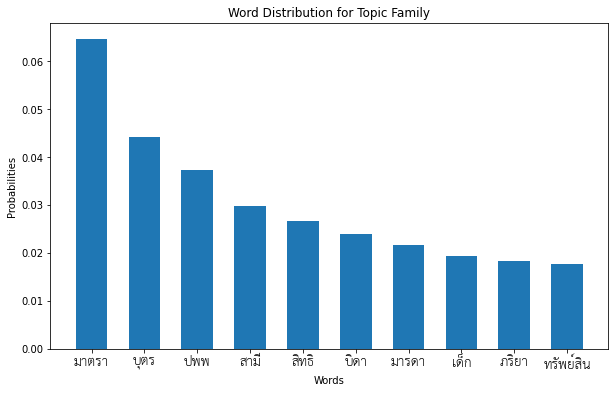

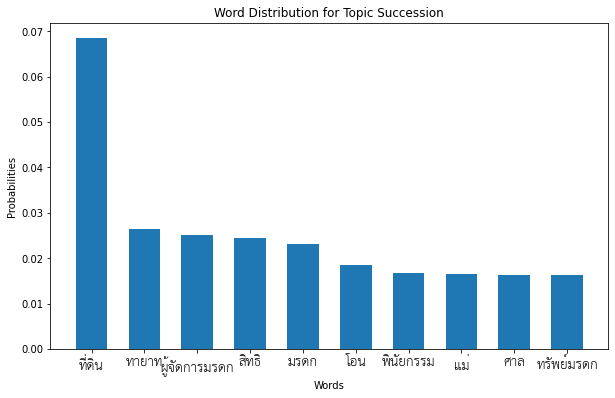

In [ ]:
plotWordDist(0)
plotWordDist(1)
plotWordDist(2)
plotWordDist(3)
plotWordDist(4)

In [ ]:
# word-topic distribution
for i in range(lda_model.num_topics):
    print(f"Topic {topic_dict.get(i)}:")
    for word, prob in lda_model.show_topic(i):
        print(f"{word}: {prob:.4f}")
    print("\n")

Topic Contract:
เงิน: 0.0324
สัญญา: 0.0322
ฟ้อง: 0.0246
ชำระหนี้: 0.0239
เจ้าหนี้: 0.0200
เช่าซื้อ: 0.0197
รถ: 0.0189
บังคับ: 0.0189
รับผิด: 0.0177
คืน: 0.0161


Topic Criminal:
ศาล: 0.0390
มาตรา: 0.0213
ความผิด: 0.0180
จำคุก: 0.0159
ฐาน: 0.0151
จำเลย: 0.0136
กระทำความผิด: 0.0128
บาท: 0.0106
ทนาย: 0.0091
ลงโทษ: 0.0088


Topic Labor:
นายจ้าง: 0.0544
ลูกจ้าง: 0.0437
จ่าย: 0.0276
มาตรา: 0.0211
เลิกจ้าง: 0.0199
บริษัท: 0.0198
สิทธิ: 0.0197
ทำงาน: 0.0164
คุ้มครอง: 0.0142
กรณี: 0.0142


Topic Family:
มาตรา: 0.0648
บุตร: 0.0442
ปพพ: 0.0374
สามี: 0.0299
สิทธิ: 0.0267
บิดา: 0.0240
มารดา: 0.0217
เด็ก: 0.0194
ภริยา: 0.0184
ทรัพย์สิน: 0.0178


Topic Succession:
ที่ดิน: 0.0684
ทายาท: 0.0265
ผู้จัดการมรดก: 0.0250
สิทธิ: 0.0245
มรดก: 0.0232
โอน: 0.0185
พินัยกรรม: 0.0168
แม่: 0.0165
ศาล: 0.0164
ทรัพย์มรดก: 0.0163




In [ ]:
#topic-document distribution
for i, doc in enumerate(corpus[:5]):
    print(f"Document {i}:")
    for topic, prob in lda_model.get_document_topics(doc):
        print(f"Topic {topic_dict.get(topic)}: {prob:.4f}")
    print("\n")

Document 0:
Topic Contract: 0.2478
Topic Labor: 0.1017
Topic Family: 0.6373


Document 1:
Topic Contract: 0.0267
Topic Criminal: 0.1022
Topic Labor: 0.0132
Topic Family: 0.0623
Topic Succession: 0.7955


Document 2:
Topic Contract: 0.3402
Topic Criminal: 0.5063
Topic Labor: 0.0651
Topic Family: 0.0459
Topic Succession: 0.0425


Document 3:
Topic Contract: 0.0173
Topic Criminal: 0.0645
Topic Labor: 0.0210
Topic Family: 0.1269
Topic Succession: 0.7702


Document 4:
Topic Contract: 0.4582
Topic Criminal: 0.4095
Topic Labor: 0.0767
Topic Family: 0.0227
Topic Succession: 0.0329




Find optimize number of topics between 2-10
and plot coherence value each topic

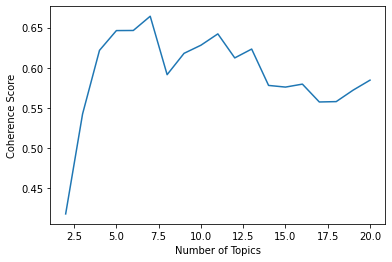

Optimal number of topics: 7
Max coherence score : 0.6642221280750534


In [ ]:
min_topics, max_topics = 2, 20
step_size = 1

coherence_scores = []
num_topics_list = []

for num_topics in range(min_topics, max_topics+1, step_size):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              passes=10,
                                              iterations=100,
                                              chunksize=200,
                                              alpha=0.5,
                                              eta=0.01)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_answer, dictionary=id2word, coherence='c_v')
  coherence_score = coherence_model_lda.get_coherence()
  coherence_scores.append(coherence_score)
  num_topics_list.append(num_topics)

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_answer, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

plt.plot(num_topics_list, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()
# Find the optimal number of topics with the highest coherence score
optimal_num_topics = num_topics_list[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_num_topics}\nMax coherence score : {max(coherence_scores)}")

word distribution as bar plot

bar plot for topic-document distribution

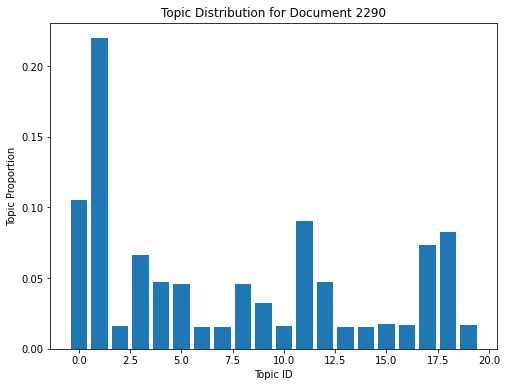

In [ ]:
doc_id = np.random.randint(len(train_data)) 
doc_topics = lda_model.get_document_topics(corpus[doc_id]) 

# plot the bar chart
plt.figure(figsize=(8,6))
plt.bar([t[0] for t in doc_topics], [t[1] for t in doc_topics])
plt.xlabel('Topic ID')
plt.ylabel('Topic Proportion')
plt.title(f'Topic Distribution for Document {doc_id}')
plt.show()

topic for each document

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus):
  sent_topics_df = pd.DataFrame()
  for i, row in enumerate(ldamodel[corpus]):
      row = sorted(row, key=lambda x: (x[1]), reverse=True)
      for j, (topic_num, prop_topic) in enumerate(row):
          if j == 0:  # => dominant topic
              wp = ldamodel.show_topic(topic_num)
              topic_keywords = ", ".join([word for word, prop in wp])
              sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)
          else:
            break
  return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib']

# Show
df_dominant_topic.head(20)
 

lda visualization

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))

LDAvis_data_filepath
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.079689  0.246183       1        1  25.943121
2     -0.126406 -0.041392       2        1  22.703340
3     -0.218470 -0.130870       3        1  19.790651
4      0.217508  0.105307       4        1  17.274267
1      0.207056 -0.179228       5        1  14.288621, topic_info=          Term         Freq        Total Category  logprob  loglift
308     ที่ดิน  3066.000000  3066.000000  Default  30.0000  30.0000
383    นายจ้าง  3280.000000  3280.000000  Default  29.0000  29.0000
385    ลูกจ้าง  2635.000000  2635.000000  Default  28.0000  28.0000
179       บุตร  2358.000000  2358.000000  Default  27.0000  27.0000
36        สามี  1628.000000  1628.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
158        ศาล   486.953029  4305.557091   Topic5  -4.4534  -0.2338
351       กรณี   380.723931  2467.537862   Topic5  -4.6995   0.0768
0       กฎหมาย   309.026573  1547.943451   Topic5  -4.9081   0.3345
18   ทรัพย์สิน   305.137212  1460.496627   Topic5  -4.9208   0.3799
105       ฟ้อง   272.719518  2741.583733   Topic5  -5.0331  -0.3621

[271 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.147938      กฎหมาย
0         2  0.222230      กฎหมาย
0         3  0.309443      กฎหมาย
0         4  0.120159      กฎหมาย
0         5  0.199620      กฎหมาย
...     ...       ...         ...
520       3  1.001716     ใบลาออก
1742      5  0.995437     ให้เช่า
271       1  0.999091  ไกล่เกลี่ย
1006      4  0.998605     ได้เสีย
745       1  1.000267     ไฟแนนซ์

[346 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 5, 2])

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
pyLDAvis.save_html(vis, 'topic_distribution.html')
pyLDAvis.display(vis)

\The sections below are in the process of being updated with new documents.

In [ ]:
def preprocess(text):
  result = []
  str_text = str(text).replace(' ','')
  word_token = word_tokenize(str_text, engine='newmm')
  for word in word_token:
    if(word not in stopwords + add_stopwords):
      result.append(word)
  #result = map(lambda x: re.sub('[,/.?# ]', '', x), result)
  return result

In [ ]:
def bow(text):
  vector = id2word.doc2bow(text)
  return vector

In [ ]:
new_doc = random.choice(test_data)
test_doc = preprocess(new_doc)
test_doc = bow(test_doc)

In [ ]:
lda_model = LdaModel.load('/content/drive/MyDrive/dpst_project/lda_model.pickle')

new_doc_topics = lda_model.get_document_topics(test_doc)
new_doc_topics_dict = {topic_dict[topic]: prob for topic, prob in new_doc_topics}
print(new_doc_topics_dict)

{'Contract': 0.06951626, 'Criminal': 0.88550067, 'Labor': 0.01349232, 'Family': 0.018119017, 'Succession': 0.013371704}


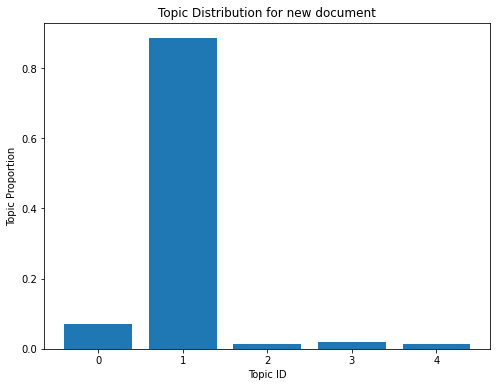

In [ ]:
# plot the bar chart
plt.figure(figsize=(8,6))
plt.bar([t[0] for t in new_doc_topics], [t[1] for t in new_doc_topics])
plt.xlabel('Topic ID')
plt.ylabel('Topic Proportion')
plt.title(f'Topic Distribution for new document')
plt.show()

Similarity query

In [ ]:
corpus_lda = lda_model[corpus]
index = similarities.MatrixSimilarity(corpus_lda, num_features=len(id2word))
sims = index[new_doc_topics]
sims_sorted = sorted(enumerate(sims), key=lambda item: -item[1])
print(f"Topic distribution for new document : {new_doc_topics}\n{new_doc}\n")
for doc_id, similarity in sims_sorted[:5]:
    print(f"Document ID: {doc_id}, Similarity score: {similarity}")
    print(data.answer[doc_id])
    print("Topic distribution for similar document : ")
    for num, dis in corpus_lda[doc_id]:
      print(f"\t({topic_dict.get(num)}, {'%.5f' %dis})")
    #print("\n")
    #print(f"Topic distribution for similar document : \n{corpus_lda[doc_id]}\n")

Topic distribution for new document : [(0, 0.06951626), (1, 0.88550067), (2, 0.01349232), (3, 0.018119017), (4, 0.013371704)]
ก็มีความผิดฐานลักทรัพย์ในสถานที่ราชการมีโทษจำคุกปีอาจถูกฟ้องเรียกราคาทรัพย์สินไปพร้อมด้วยก็ได้จะถูกจำคุกจริงกี่ปีก็อยู่ที่การพิจารณาของศาลถ้าไม่เคยต้องโทษมาก่อนหรืออายุยังน้อยมีเหตุอันควรปรานีอาจไม่ถูกจำคุกคือให้รอการลงโทษไว้แล้วปล่อยตัวไปที่เรียกกันว่ารออาญาโดยมีเงื่อนไขการคุมประพฤติเป็นต้นดังนั้นเมื่อถูกฟ้องควรหาทนายความช่วยเหลือเพื่อหาช่องทางให้ได้รับการลดโทษหรือรอการลงโทษการใช้ทนายอาสาที่ศาลจัดหาให้บางทีก็ติดต่อสื่อสารหรือพูดคุยกันอาจไม่ชัดเจนเหมือนทนายที่เราจัดหาเองเว้นแต่จะไปเจอทนายทั่มีจรรยาบรรรสูงที่ให้ความช่วยเหลืออย่างจริงจังถ้าเป็นเช่นนั้นก็ถือว่าโชคดี

Document ID: 1547, Similarity score: 0.9999914169311523
การที่ญาติของท่านได้เคยถูกฟ้องเป็นจำเลยในคดีอาญาในความผิดฐานลักทรัพย์และศาลมีคำพิพากษาลงโทษปรับญาติท่านเป็นเงินบาทและโทษจำคุกให้รอลงอาญามีกำหนดปีดังนั้นต่อข้อถามที่ว่าญาติของท่านมีความผิดฐานลักทรัพย์หรือไม่จึงตอบได้ว่าญาติของท่านมีความผิดฐานลักทรั

In [ ]:
print(corpus_lda[0])
print(sims_sorted[:10])
print(index)
print(index[new_doc_topics])  

[(0, 0.24779722), (2, 0.10178224), (3, 0.63728493)]
[(1547, 0.9999914), (2439, 0.9999532), (2470, 0.9999436), (5850, 0.99992204), (2913, 0.99990964), (5858, 0.999908), (1117, 0.99988633), (2590, 0.9998666), (2938, 0.9998646), (1548, 0.9998478)]
MatrixSimilarity<6030 docs, 10049 features>
[0.04907385 0.14580514 0.8655047  ... 0.96324885 0.9947504  0.9626954 ]


In [ ]:
lda_model.update([new_doc_topics])

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:850: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words
